# Digital Steganography

### The purpose of this exercise is to demonstrate how secret messages can be encoded into innocuous looking files and then decoded once in the hands of the intended recipient. 

### In this exercise we will:

<ul>
<li>Display an Image.</li>
<li>Embed a user-specified secret message into the image.</li>
<li>Extract a secret-message from a series of images.</li>
</ul>

Note: Displaying images can take 10-15 seconds.

<a href="https://en.wikipedia.org/wiki/Steganography">Digital Steganography</a> is method of hiding secret messages inside pictures.  Let's start with a random image.  Run the next code sample to display our starter image.

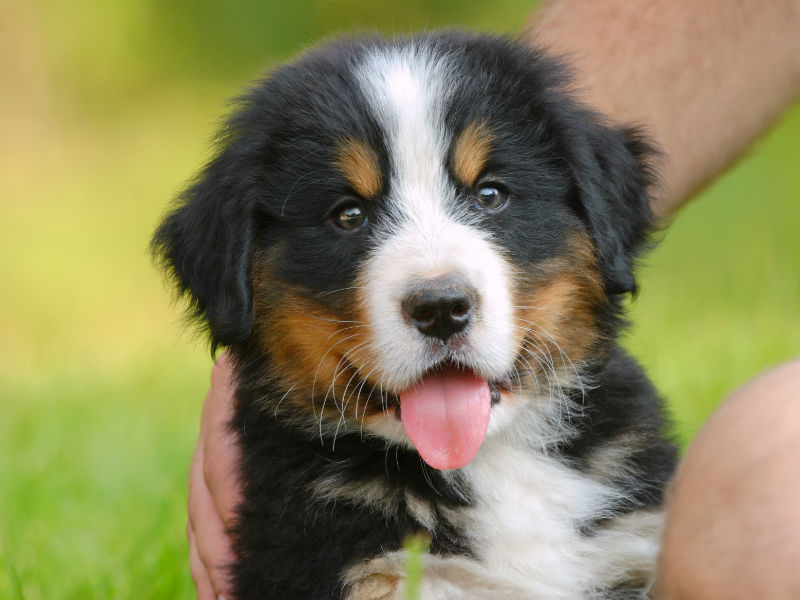

In [3]:
from PIL import Image
im = Image.open("puppy.jpg")
display(im)

We are going to hide a secret message in this image, by replacing the least significant bit of the red channel of each pixel with one bit from our message.  This image is 800 pixels by 600 pixels, so you could store a message up to 480,000 characters long with this method, about 6x the length of _Macbeth_.  Run the next code sample to embed a message in the photo.

In [ ]:
from PIL import Image
im = Image.open("puppy.jpg")

#change your message secret message here!
SecretMessage="This is a secret message.  Good job finding it."
#change your message secret message here!

my_str_as_bytes = str.encode(SecretMessage)

widthCounter = 32;
heightCounter = 0;
pix=im.load()
#first 8 contain the length
length = len(my_str_as_bytes)
#assumes the picture is at least 32 pixels wide
for i in range(0,32):
    oldValue = pix[i,0][0]
    newValue = oldValue
    if( (length & (1 << i)) != 0 ):#bit is 1
          newValue = newValue | 1
    else:#bit is 0
            newValue = newValue & ~1
    pix[0,i] = (newValue,pix[0,i][1],pix[0,i][2])
    
for i in range(0,len(my_str_as_bytes)*8):#8 bits in a byte
    oldValue = pix[widthCounter,heightCounter][0]
    newValue = oldValue
    if( (my_str_as_bytes[i//8] & (1 << (i%8))) != 0):
        newValue = newValue | 1
    else:#bit is 0
            newValue = newValue & ~(1)
    pix[widthCounter,heightCounter] = (newValue,pix[widthCounter,heightCounter][1],pix[widthCounter,heightCounter][2])
    widthCounter += 1
    if(widthCounter == im.width):
             widthCounter=0
             heightCounter += 1
                
im.save('out.bmp')
im2 = Image.open("out.bmp")
display(im2)



This new image has your secret message hidden in it.  I bet you can't tell by looking at it.  You can change the SecretMessage in the previous code sample to hide a new message.  Run the next code sample to extract your hidden message.

In [ ]:
from PIL import Image

#change the picture you want to decode here!
im = Image.open("gateway.bmp")
#change the picture you want to decode here!

pix = im.load()

length = 0
for i in range(0,32):
    length = length | ((pix[0,i][0] & 1) << i)
    
widthCounter = 32
heightCounter = 0
my_str_as_bytes = bytearray()
for i in range(0,length):#8 bits in a byte
    character = 0
    for j in range(0,8):
        character = character | ((pix[widthCounter,heightCounter][0] & 1) << j)
        widthCounter = widthCounter + 1
        if(widthCounter == im.width):
            heightCounter = heightCounter + 1
    my_str_as_bytes.append(character)
        
my_decoded_str = my_str_as_bytes.decode()
print(my_decoded_str)

You have two additional images in your notebook that have been pre-encoded with secret messages: "gateway.bmp" and "bobcat.bmp".  Try replacing those images in the previous code block instead to see what secret message they have inside!